# Prediction Prototype Algorithm


In [1]:
## Importing important libraries

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rc('xtick', labelsize=12) 
matplotlib.rc('ytick', labelsize=30)
matplotlib.rcParams.update({'font.size': 28})
from mpl_toolkits.mplot3d import Axes3D
import math
import datetime as dt
import os
import sys


## ML Models import
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn import linear_model

## Utility Functions

In [2]:

## Visulalization function 
def Visualize(dataset,List_of_count_to_print,title1,ylab,vx=50,vy=30,w=.80):
    df = dataset
    n = 0
    for i in List_of_count_to_print:
        filter1 = df['Country'] == i
        df = df[filter1]
        labels = df['Date']
        conf = df['Confirmed']
        Recov = df['Recovered']
        Death = df['Deaths']
        
        #high = max(conf)
        #low = min(conf)
        
        x = np.arange(len(labels))  # the x label locations 
        width = w  # the width of the bars
        fig, ax = plt.subplots(figsize=(vx,vy))
        rects1 = ax.bar(x - width, conf, width, label='confirmed')
        rects2 = ax.bar(x , Recov, width, label='Recovered')
        rects3 = ax.bar(x + width , Death, width, label='Death')

        # Add some text for labels, title and custom x-axis tick labels, etc.
        ax.set_ylabel(ylab)
        ax.set_title(title1)
        ax.set_xticks(x)
        plt.xticks(rotation=90) 
        #plt.ylim([math.ceil(low-0.5*(high-low)), math.ceil(high+0.5*(high-low))])
        ax.set_xticklabels(labels)
        ax.legend()
        n  = n + 1
    
    
    plt.show()
    
## function to Check the List of Countries avaialable
def count_avalaible(dataframe,country_coul_rep = 'Country'):
    x = 0
    for i in set(dataframe.loc[:,country_coul_rep]):
        print(i,end=' | ')
        x = x + 1
        if(x > 6):
            x = 0
            print()
    print("\n\n##Total No of Countries = " + str(len(set(dataframe.loc[:,country_coul_rep]))))
    
    
## Function for Cluster Plotting 

def plot_cluster(data_frame,title,xlabel,ylabel):
    g1x = []
    g1y = []
    g2x = []
    g2y = []
    g3x = []
    g3y = []
    g4x = []
    g4y = []
    g5x = []
    g5y = []

    for i,j,k in data_frame:
        if(k == 0):
            g1x.append(i)
            g1y.append(j)
        elif(k==1):
            g2x.append(i)
            g2y.append(j)
        elif(k==2):
            g3x.append(i)
            g3y.append(j)
        elif(k==3):
            g4x.append(i)
            g4y.append(j)
        elif(k==4):
            g5x.append(i)
            g5y.append(j)



    data = [(g1x,g1y), (g2x,g2y), (g3x,g3y), (g4x,g4y), (g5x,g5y)]
    colors = ("red", "green", "blue","yellow",'purple')
    groups = ("Sever1", "Sever2", "Sever3","Sever4","Sever5")

    # Create plot
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1, facecolor = "1.0")

    for data, color, group in zip(data, colors, groups):
        print(data)
        t = data
        x , y = t
        ax.scatter(x, y, alpha=0.8, c=color, edgecolors='none', s=100, label=group)

    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    plt.title(title)
    plt.legend(loc=2,prop={"size":10})
    plt.show()
    
    
def plot_cluster_3d(data_frame,title,xlabel,ylabel,zlabel):
    
    a = []
    b = []
    c = []
    d = []
    
    for i in data_frame:
        a.append(i[0][0])
        b.append(i[1][0])
        c.append(i[2][0])
        d.append(i[3])
        
    data = pd.DataFrame()
    
    data['val1'] = a
    data['val2'] = b
    data['val3'] = c
    data['cluster'] = d
    
    colors = ["red", "green", "blue","yellow",'purple']
    groups = ["Sever1", "Sever2", "Sever3","Sever4","Sever5"]
    
    for i in range(1,len(data)):
        print(data.iloc[i])
    
    
    # Create plot
    fig = plt.figure()
    ax = fig.add_subplot(111,projection='3d')
    #ax = Axes3D(fig)
    
    print(data)
    
    x = np.array(data['val1'])
    y = np.array(data['val2'])
    z = np.array(data['val3'])
    
    ax.scatter(x,y,z, marker="s", c='red', edgecolors='none', s=100, label=groups) #,cmap="RdBu")

    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_zlabel(zlabel)
    plt.title(title)
    plt.legend(loc=2,prop={"size":10})
    plt.show()
    
    

   Feature1  Feature2  Feature3  Cluster
0  0.828343  0.683050  0.313689      1.0
1  0.514422  0.428823  0.610627      0.0
2  0.627719  0.482618  0.807789      0.0
3  0.554799  0.351321  0.178162      0.0
4  0.394928  0.576851  0.081844      0.0
5  0.387647  0.838106  0.302403      0.0
6  0.739402  0.300423  0.727743      0.0
7  0.990837  0.298405  0.008082      0.0
8  0.928738  0.352797  0.754473      1.0
9  0.212725  0.235133  0.949035      0.0


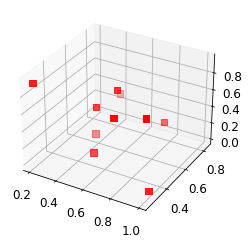

In [3]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import numpy as np

v = np.random.rand(10,4)
v[:,3] = np.random.randint(0,2,size=10)
df = pd.DataFrame(v, columns=['Feature1', 'Feature2','Feature3',"Cluster"])
print (df)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x = np.array(df['Feature1'])
y = np.array(df['Feature2'])
z = np.array(df['Feature3'])

ax.scatter(x,y,z, marker="s", c='red', s=40) #cmap="RdBu")

plt.show()

# Creating Data Frames for Already Processed DataSets

In [4]:
Covid_19_Countires_Wise = pd.read_csv('../../Covid-19-Data(selected-dataset)/countries-aggregated.csv')
Blood_Pressure_Countires_Wise = pd.read_csv('../Pre_Processed_Data/Blood_Pressure_Countires_Wise_Processed.csv')
Diabetes_Countires_Wise = pd.read_csv('../Pre_Processed_Data/Diabetes_Countires_Wise_Processed.csv')
HIV_Countires_Wise = pd.read_csv('../Pre_Processed_Data/HIV_Countires_Wise_Processed.csv')
Medical_Expending_Countires_Wise = pd.read_csv('../Pre_Processed_Data/Medical_Expending_Countires_Wise_Processed.csv')
Population_Data_Countires_Wise = pd.read_csv('../Pre_Processed_Data/Population_Data_Countires_Wise_Processed.csv')
Tuber_Culosis_Countires_Wise = pd.read_csv('../Pre_Processed_Data/Tuber_Culosis_Countires_Wise_Processed.csv')

## Removing extra Unnamed:0 columns created during file storage 

Blood_Pressure_Countires_Wise = Blood_Pressure_Countires_Wise.drop(['Unnamed: 0'],axis=1)
Diabetes_Countires_Wise = Diabetes_Countires_Wise.drop(['Unnamed: 0'],axis=1)
HIV_Countires_Wise = HIV_Countires_Wise.drop(['Unnamed: 0'],axis=1)
Medical_Expending_Countires_Wise = Medical_Expending_Countires_Wise.drop(['Unnamed: 0'],axis=1)
Population_Data_Countires_Wise = Population_Data_Countires_Wise.drop(['Unnamed: 0'],axis=1)
Tuber_Culosis_Countires_Wise = Tuber_Culosis_Countires_Wise.drop(['Unnamed: 0'],axis=1)


## 1. Covid_19_Countires_Wise Analysis

## Data Preprocessing

In [5]:
data = np.array(Covid_19_Countires_Wise)
date_range = data[:,0]
Country_name = data[:,1]
time_series_data = data[:,[2,3,4]]
print(time_series_data)

Xs = time_series_data

n = len(set(list(data[:,0])))
print(n)

[[0 0 0]
 [0 0 0]
 [0 0 0]
 ...
 [8021 7627 230]
 [8036 7632 230]
 [8055 7640 231]]
267


## Creating Time Series model

In [6]:
## No of days data collected so far
n = len(set(list(data[:,0])))

def time_series_forecaste(data,pred):
    fix_latest_data = np.amax(data,axis=0)[0]
    w1 = []
    fix_latest_data = np.datetime64(fix_latest_data) + np.timedelta64(1,'D')
    predict_frame = np.zeros(shape=(1,5)) 
    filter1 = []
    #latest_data = type(dt.datetime(latest_data))
    countries = set(list(data[:,1]))
    p = 0
    x = 0 
    for i in countries:
        latest_data = fix_latest_data
        filter1.clear()
        p = p + 1
        completed = (p/len(countries))*100
        if(p == n/4 or p == n/2 or p == (n*3)/4 or p == n):
            print(f'% completed = {completed}', flush=True)
        count = pred
        
        for j in range(0,len(data[:,0])):
            if(data[j,1] == i):
                filter1.append(True)
            else:
                filter1.append(False)
        data2 = data[filter1]
        w1.clear()
        for j in range(0,len(data2[:,0])):
            if(data2[j,1] == i):
                x = x + 1
                
                for k in range(len(data2[:,[2]])):
                    w1.append((len(data2[:,[2]])- k)/len(data2[:,[2]]))
                
                count = count - 1
                val1 = ((sum(data2[:,2]*w1))/len(data2[:,[2]]))
                val2 = ((sum(data2[:,3]*w1))/len(data2[:,[3]]))
                val3 = ((sum(data2[:,4]*w1))/len(data2[:,[4]]))
                predict_frame = np.append(predict_frame,[str(latest_data),str(i),str(int(val1)),str(int(val2)),str(int(val3))])
                predict_frame = predict_frame.reshape((int(len(predict_frame)/5)),5)
                latest_data = np.datetime64(latest_data) + np.timedelta64(1,'D')
                data2 = np.append(data2,[str(latest_data),str(i),int(val1),int(val2),int(val3)])
                data2 = data2.reshape((int(len(data2)/5)),5)
                data2[:,[2,3,4]] = data2[:,[2,3,4]].astype(np.int)
                w1.clear()
                if(count < 0):
                    break
    new_val = pd.DataFrame(predict_frame[1:,[0,1,2,3,4]])
    new_val = new_val.rename(columns = {0:'Date',1:'Country',2:'Confirmed',3:'Recovered',4:'Deaths'}, inplace = False)
    print('  completed Succesfully ', flush=True)
    return new_val
                
No_of_days_to_predict_in_future = 15         
val123 = time_series_forecaste(data,No_of_days_to_predict_in_future) 


#val123  # Unocment to diplay the frame structure



  completed Succesfully 


In [7]:
val = np.array(val123)
val[:,[2]].astype(np.int)
w1 = []
for i in range(len(val[:,[2]])):
    w1.append((len(val[:,[2]])-i)/len(val[:,[2]]))
#print(val[:,[2]].astype(np.int))    
#print(val[:,[2]].astype(np.int)*w1)
#val[:,[2]].astype(np.int)*(val[:,[2]].astype(np.int)/63794)

In [8]:
Complete_Data = val123
filter1 = val123['Country'] == 'US'
val123 = val123[filter1]
# val123 # Uncomment to view frame structure

## Visualize Covid-19 Time Series Predictions

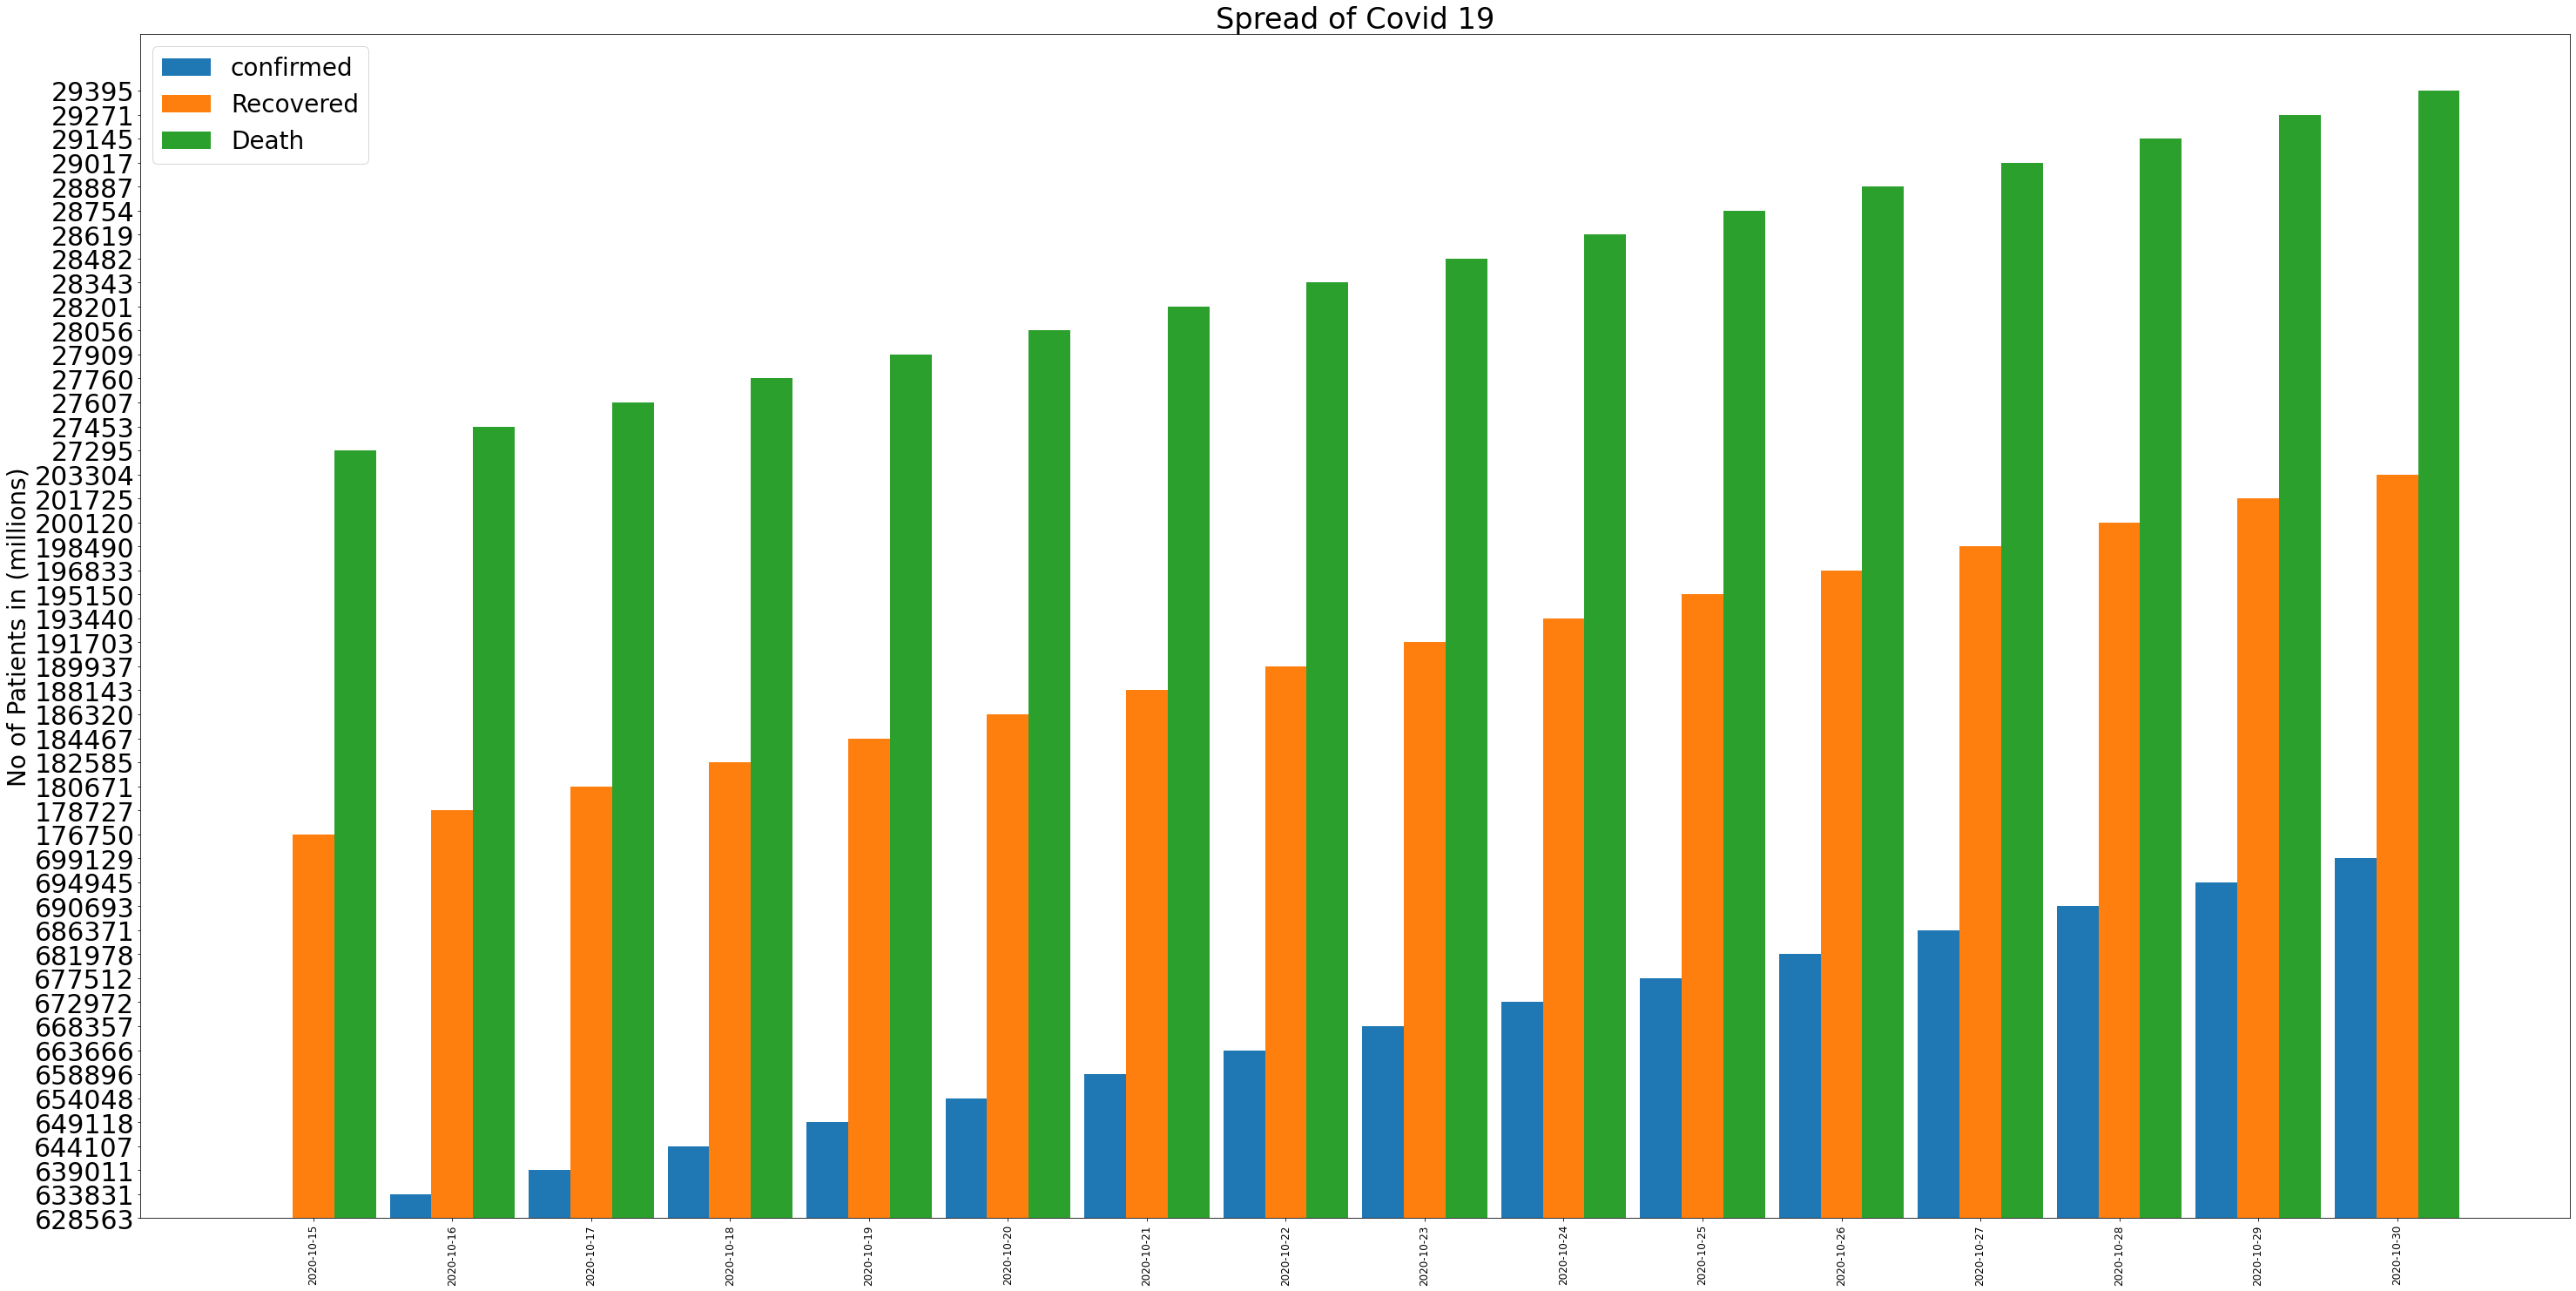

In [9]:
#print(Covid_19_Countires_Wise)
Visualize(val123, 
          ['US'],'Spread of Covid 19','No of Patients in (millions)',vx=50,vy=25,w=.3)

## Prediction Prototype Algorithm

In [10]:
countries = ['Afghanistan','Italy' , 'Kuwait', 'India', 'South Africa' ,'US', 
             'United Kingdom','Sri Lanka', 'Chile' , 'Norway', 'New Zealand' ,'Switzerland', 
'Australia', 'Canada', 'China','Slovenia','North Macedonia']
#US

In [11]:
Complete_Data


Date   Country Confirmed Recovered Deaths
0     2020-10-15   Germany     50464     40306   1995
1     2020-10-16   Germany     50664     40494   2003
2     2020-10-17   Germany     50861     40679   2010
3     2020-10-18   Germany     51055     40860   2018
4     2020-10-19   Germany     51245     41039   2025
...          ...       ...       ...       ...    ...
3019  2020-10-26  Cambodia        47        38      0
3020  2020-10-27  Cambodia        47        38      0
3021  2020-10-28  Cambodia        47        39      0
3022  2020-10-29  Cambodia        47        39      0
3023  2020-10-30  Cambodia        47        39      0

[3024 rows x 5 columns]

In [12]:
# Covid Data 
Complete_Data = np.array(Complete_Data)
Complete_Data[:,[2,3,4]] = np.array(Complete_Data[:,[2,3,4]]).astype(int)
selected_countries = np.zeros(shape=(1,4)) 
data = Complete_Data[:,[0,1,2,3,4]]
filter1 = []
for i in countries:
    filter1.clear()
    for j in range(0,len(data[:,0])):
            if(data[j,1] == i):
                filter1.append(True)
            else:
                filter1.append(False)
    Complete_Data = data[filter1]
    for j in range(0,len(Complete_Data[:,0])):
                if(Complete_Data[j,1] == i):
                
                    '''for k in range(0,len(Complete_Data[:,[2]])):
                        w1.append((len(Complete_Data[:,[2]])- k)/len(Complete_Data[:,[2]]))
                                                                                            '''
                    val1 = ((sum(Complete_Data[:,2]))/len(Complete_Data[:,[2]]))
                    val2 = ((sum(Complete_Data[:,3]))/len(Complete_Data[:,[3]]))
                    val3 = ((sum(Complete_Data[:,4]))/len(Complete_Data[:,[4]]))
                    selected_countries = np.append(selected_countries,[str(i),int(val1),int(val2),int(val3)])
                    selected_countries = selected_countries.reshape((int(len(selected_countries)/4)),4)
                    break;
selected_countries   = selected_countries[1:,[0,1,2,3]]


print(selected_countries[:,[0,1,2,3]])



[['Afghanistan' '4923' '2551' '142']
 ['Italy' '64667' '37690' '8774']
 ['Kuwait' '9019' '6978' '61']
 ['India' '229887' '163698' '4680']
 ['South Africa' '45436' '32281' '888']
 ['US' '665199' '190522' '28387']
 ['United Kingdom' '65653' '312' '8897']
 ['Sri Lanka' '430' '310' '2']
 ['Chile' '46287' '38452' '1016']
 ['Norway' '2491' '1335' '60']
 ['New Zealand' '422' '352' '4']
 ['Switzerland' '9216' '7202' '489']
 ['Australia' '2971' '2148' '46']
 ['Canada' '23075' '14917' '1656']
 ['China' '36537' '29258' '1682']
 ['Slovenia' '509' '300' '27']
 ['North Macedonia' '1390' '848' '62']]


In [13]:
#clustering = DBSCAN(eps=300, min_samples=5).fit(selected_countries[:,[1,2,3]])
clustering = KMeans(n_clusters=5, random_state=0).fit(selected_countries[:,[1,2,3]])
clustering.labels_
clus = list(clustering.labels_)
covid_frame = list(zip(countries,clus))
print(covid_frame)
covid_frame1 = list(zip(selected_countries[:,[2]].tolist(),selected_countries[:,[3]].tolist(),clus))
print(covid_frame1)

[('Afghanistan', 0), ('Italy', 3), ('Kuwait', 0), ('India', 2), ('South Africa', 3), ('US', 1), ('United Kingdom', 4), ('Sri Lanka', 0), ('Chile', 3), ('Norway', 0), ('New Zealand', 0), ('Switzerland', 0), ('Australia', 0), ('Canada', 0), ('China', 3), ('Slovenia', 0), ('North Macedonia', 0)]
[(['2551'], ['142'], 0), (['37690'], ['8774'], 3), (['6978'], ['61'], 0), (['163698'], ['4680'], 2), (['32281'], ['888'], 3), (['190522'], ['28387'], 1), (['312'], ['8897'], 4), (['310'], ['2'], 0), (['38452'], ['1016'], 3), (['1335'], ['60'], 0), (['352'], ['4'], 0), (['7202'], ['489'], 0), (['2148'], ['46'], 0), (['14917'], ['1656'], 0), (['29258'], ['1682'], 3), (['300'], ['27'], 0), (['848'], ['62'], 0)]


[['2551'], ['37690'], ['6978'], ['163698'], ['32281'], ['190522'], ['312'], ['310'], ['38452'], ['1335'], ['352'], ['7202'], ['2148'], ['14917'], ['29258'], ['300'], ['848']]


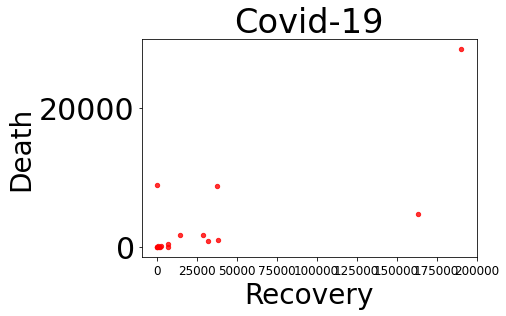

In [14]:
# Plotting Clusters

area = np.pi*6
x = selected_countries[:,[2]].tolist()
y = selected_countries[:,[3]].tolist()
print(x)
# Plot
plt.scatter(x, y, s=area, c='red', alpha=0.8)
plt.title('Covid-19')
plt.xlabel('Recovery')
plt.ylabel('Death')
plt.show()

([['2551'], ['6978'], ['310'], ['1335'], ['352'], ['7202'], ['2148'], ['14917'], ['300'], ['848']], [['142'], ['61'], ['2'], ['60'], ['4'], ['489'], ['46'], ['1656'], ['27'], ['62']])
([['190522']], [['28387']])
([['163698']], [['4680']])
([['37690'], ['32281'], ['38452'], ['29258']], [['8774'], ['888'], ['1016'], ['1682']])
([['312']], [['8897']])


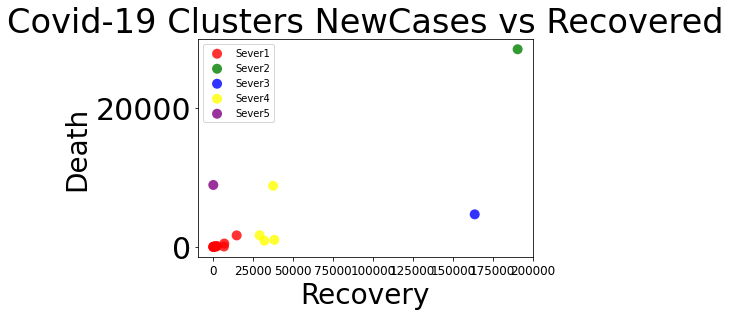

In [15]:
# Visulaize  Clusters 
title = 'Covid-19 Clusters NewCases vs Recovered'
xlabel = 'Recovery'
ylabel = 'Death'
zlabel = "cases_detected"
plot_cluster(covid_frame1,title,xlabel,ylabel)

# Co-morbidities Dataframe Clustering

In [16]:
countries = ['Afghanistan','Italy' , 'Kuwait', 'India', 'South Africa' ,'US', 
             'United Kingdom','Sri Lanka', 'Chile' , 'Norway', 'New Zealand' ,'Switzerland', 
'Australia', 'Canada', 'China','Slovenia','North Macedonia'] #US

## HIV

In [17]:
## Check the List of Countries avaialable
#HIV_Countires_Wise = pd.read_csv('../HIV infected Population/Data_Extract_From_Health_Nutrition_and_Population_Statistics/c600116a-af72-4faa-945a-ab00ddddb96e_Data.csv')

## Columns renaming for Uniformity

#------------------------------------------------------------
HIV_Countires_Wise_complete = HIV_Countires_Wise
# HIV Data 
HIV_Countires_Wise_complete = np.array(HIV_Countires_Wise_complete)
HIV_Countires_Wise_complete[:,[2,3,4]] = np.array(HIV_Countires_Wise_complete[:,[2,3,4]]).astype(int)
selected_countries = np.zeros(shape=(1,4)) 
data_hiv = HIV_Countires_Wise_complete[:,[0,1,2,3,4]]
filter2 = []
for i in countries:
    filter2.clear()
    for j in range(0,len(data_hiv[:,0])):
            if(data_hiv[j,0] == i):
                filter2.append(True)
            else:
                filter2.append(False)
    HIV_Countires_Wise_complete = data_hiv[filter2]
    for j in range(0,len(HIV_Countires_Wise_complete[:,0])):
                if(HIV_Countires_Wise_complete[j,0] == i):
                    val1 = ((sum(HIV_Countires_Wise_complete[:,2]))/len(HIV_Countires_Wise_complete[:,[2]]))
                    val2 = ((sum(HIV_Countires_Wise_complete[:,3]))/len(HIV_Countires_Wise_complete[:,[3]]))
                    val3 = ((sum(HIV_Countires_Wise_complete[:,4]))/len(HIV_Countires_Wise_complete[:,[4]]))
                    selected_countries = np.append(selected_countries,[str(i),int(val1),int(val2),int(val3)])
                    selected_countries = selected_countries.reshape((int(len(selected_countries)/4)),4)
                    break;
selected_countries   = selected_countries[1:,[0,1,2,3]]


print(selected_countries[:,[0,1,2,3]])

[['Afghanistan' '6500' '6900' '6700']
 ['Italy' '130000' '130000' '130000']
 ['Kuwait' '600' '640' '620']
 ['India' '0' '0' '0']
 ['South Africa' '7300000' '7500000' '7400000']
 ['US' '0' '0' '0']
 ['United Kingdom' '100000' '50000' '50000']
 ['Sri Lanka' '3500' '3400' '3450']
 ['Chile' '66000' '71000' '68500']
 ['Norway' '5700' '5800' '5750']
 ['New Zealand' '3500' '3600' '3550']
 ['Switzerland' '0' '0' '0']
 ['Australia' '27000' '28000' '27500']
 ['Canada' '0' '0' '0']
 ['China' '0' '0' '0']
 ['Slovenia' '0' '0' '0']
 ['North Macedonia' '500' '500' '500']]


In [18]:
clustering = KMeans(n_clusters=5, random_state=0).fit(selected_countries[:,[1,2,3]])
clustering.labels_
clus = list(clustering.labels_)
hiv_frame = list(zip(countries,clus))
print(hiv_frame)
print("-------------------------cluster data wise---------------------------------------")
hiv_frame1 = list(zip(selected_countries[:,[2]].tolist(),selected_countries[:,[3]].tolist(),clus))
hiv_frame2 = list(zip(selected_countries[:,[1]].tolist(),selected_countries[:,[2]].tolist(),selected_countries[:,[3]].tolist(),clus))
print(hiv_frame1)
print("-------------------------------------------------------------------------------")
print(hiv_frame2)
pd.DataFrame(np.array(hiv_frame2),columns=['val1','val2','val3','cluster'])

[('Afghanistan', 4), ('Italy', 2), ('Kuwait', 4), ('India', 4), ('South Africa', 1), ('US', 4), ('United Kingdom', 3), ('Sri Lanka', 4), ('Chile', 3), ('Norway', 4), ('New Zealand', 4), ('Switzerland', 4), ('Australia', 0), ('Canada', 4), ('China', 4), ('Slovenia', 4), ('North Macedonia', 4)]
-------------------------cluster data wise---------------------------------------
[(['6900'], ['6700'], 4), (['130000'], ['130000'], 2), (['640'], ['620'], 4), (['0'], ['0'], 4), (['7500000'], ['7400000'], 1), (['0'], ['0'], 4), (['50000'], ['50000'], 3), (['3400'], ['3450'], 4), (['71000'], ['68500'], 3), (['5800'], ['5750'], 4), (['3600'], ['3550'], 4), (['0'], ['0'], 4), (['28000'], ['27500'], 0), (['0'], ['0'], 4), (['0'], ['0'], 4), (['0'], ['0'], 4), (['500'], ['500'], 4)]
-------------------------------------------------------------------------------
[(['6500'], ['6900'], ['6700'], 4), (['130000'], ['130000'], ['130000'], 2), (['600'], ['640'], ['620'], 4), (['0'], ['0'], ['0'], 4), (['7300

val1       val2       val3 cluster
0      [6500]     [6900]     [6700]       4
1    [130000]   [130000]   [130000]       2
2       [600]      [640]      [620]       4
3         [0]        [0]        [0]       4
4   [7300000]  [7500000]  [7400000]       1
5         [0]        [0]        [0]       4
6    [100000]    [50000]    [50000]       3
7      [3500]     [3400]     [3450]       4
8     [66000]    [71000]    [68500]       3
9      [5700]     [5800]     [5750]       4
10     [3500]     [3600]     [3550]       4
11        [0]        [0]        [0]       4
12    [27000]    [28000]    [27500]       0
13        [0]        [0]        [0]       4
14        [0]        [0]        [0]       4
15        [0]        [0]        [0]       4
16      [500]      [500]      [500]       4

([['28000']], [['27500']])
([['7500000']], [['7400000']])
([['130000']], [['130000']])
([['50000'], ['71000']], [['50000'], ['68500']])
([['6900'], ['640'], ['0'], ['0'], ['3400'], ['5800'], ['3600'], ['0'], ['0'], ['0'], ['0'], ['500']], [['6700'], ['620'], ['0'], ['0'], ['3450'], ['5750'], ['3550'], ['0'], ['0'], ['0'], ['0'], ['500']])


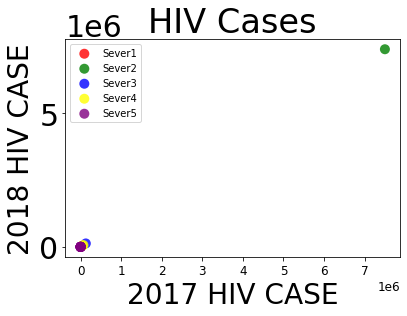

In [19]:
# Visulaize  Clusters 
title = 'HIV Cases'
xlabel = '2017 HIV CASE'
ylabel = '2018 HIV CASE'
zlabel = '2016 HIV CASE'
plot_cluster(hiv_frame1,title,xlabel,ylabel)
#plot_cluster_3d(hiv_frame2,title,xlabel,ylabel,zlabel)

## Blood Pressure

In [20]:
BP_Male_Data = Blood_Pressure_Countires_Wise[(Blood_Pressure_Countires_Wise['Sex']=='Men') & 
                                             (Blood_Pressure_Countires_Wise['Year']==2015)]
#BP_Male_Data = Blood_Pressure_Countires_Wise[Blood_Pressure_Countires_Wise['Year']==2015]
BP_Male_Data

Country  ISO  Sex  Year  Prevalence of raised blood pressure  \
40       Afghanistan  AFG  Men  2015                             0.304321   
81           Albania  ALB  Men  2015                             0.330165   
122          Algeria  DZA  Men  2015                             0.254158   
163   American Samoa  ASM  Men  2015                             0.243653   
204          Andorra  AND  Men  2015                             0.231990   
...              ...  ...  ...   ...                                  ...   
8035       Venezuela  VEN  Men  2015                             0.215042   
8076        Viet Nam  VNM  Men  2015                             0.250457   
8117           Yemen  YEM  Men  2015                             0.298834   
8158          Zambia  ZMB  Men  2015                             0.276252   
8199        Zimbabwe  ZWE  Men  2015                             0.269041   

      Prevalence of raised blood pressure lower 95% uncertainty interval  \
40                                             0.204383                    
81                                             0.230231                    
122                                            0.170690                    
163                                            0.151746                    
204                                            0.143218                    
...                                                 ...                    
8035                                           0.138169                    
8076                                           0.167932                    
8117                                           0.195063                    
8158                                           0.181244                    
8199                                           0.174750                    

      Prevalence of raised blood pressure upper 95% uncertainty interval  
40                                             0.416141                   
81                                             0.442906                   
122                                            0.351744                   
163                                            0.357891                   
204                                            0.334658                   
...                                                 ...                   
8035                                           0.304783                   
8076                                           0.340519                   
8117                                           0.415926                   
8158                                           0.384686                   
8199                                           0.373681                   

[200 rows x 7 columns]

In [21]:
## Check the List of Countries avaialable

## Columns renaming for Uniformity
BP_Male_Data = Blood_Pressure_Countires_Wise[(Blood_Pressure_Countires_Wise['Sex']=='Men') & 
                                             (Blood_Pressure_Countires_Wise['Year']==2015)]

BP_Female_Data =Blood_Pressure_Countires_Wise[(Blood_Pressure_Countires_Wise['Sex']=='Women') & 
                                             (Blood_Pressure_Countires_Wise['Year']==2015)]
#------------------------------------------------------------
Blood_Pressure_Countires_Wise_complete = BP_Male_Data
# BP Data 
Blood_Pressure_Countires_Wise_complete = np.array(Blood_Pressure_Countires_Wise_complete)
Blood_Pressure_Countires_Wise_complete[:,[4,5,6]] = np.array(Blood_Pressure_Countires_Wise_complete[:,[4,5,6]]).astype(float)
selected_countries = np.zeros(shape=(1,4)) 
data_bp = Blood_Pressure_Countires_Wise_complete[:,[0,1,2,3,4,5,6]]
print(data_bp)
filter2 = []
for i in countries:
    filter2.clear()
    for j in range(0,len(data_bp[:,0])):
            if(data_bp[j,0] == i):
                filter2.append(True)
            else:
                filter2.append(False)
    Blood_Pressure_Countires_Wise_complete = data_bp[filter2]
    for j in range(0,len(Blood_Pressure_Countires_Wise_complete[:,0])):
                if(Blood_Pressure_Countires_Wise_complete[j,0] == i):
                    val1 = ((sum(Blood_Pressure_Countires_Wise_complete[:,4]))/len(Blood_Pressure_Countires_Wise_complete[:,[4]]))
                    val2 = ((sum(Blood_Pressure_Countires_Wise_complete[:,5]))/len(Blood_Pressure_Countires_Wise_complete[:,[5]]))
                    val3 = ((sum(Blood_Pressure_Countires_Wise_complete[:,6]))/len(Blood_Pressure_Countires_Wise_complete[:,[6]]))
                    selected_countries = np.append(selected_countries,[str(i),float(val1),float(val2),float(val3)])
                    selected_countries = selected_countries.reshape((int(len(selected_countries)/4)),4)
                    break;
selected_countries_male   = selected_countries[1:,[0,1,2,3]]
print("-----------------------------------------MALE DATA-------------------------------------------------")
print(selected_countries_male[:,[0,1,2,3]])

#-----------------------------------------------------------------------------------------------------------------------

Blood_Pressure_Countires_Wise_complete = BP_Female_Data
# BP Data 
Blood_Pressure_Countires_Wise_complete = np.array(Blood_Pressure_Countires_Wise_complete)
Blood_Pressure_Countires_Wise_complete[:,[4,5,6]] = np.array(Blood_Pressure_Countires_Wise_complete[:,[4,5,6]]).astype(float)
selected_countries = np.zeros(shape=(1,4)) 
data_bp = Blood_Pressure_Countires_Wise_complete[:,[0,1,2,3,4,5,6]]
print(data_bp)
filter2 = []
for i in countries:
    filter2.clear()
    for j in range(0,len(data_bp[:,0])):
            if(data_bp[j,0] == i):
                filter2.append(True)
            else:
                filter2.append(False)
    Blood_Pressure_Countires_Wise_complete = data_bp[filter2]
    for j in range(0,len(Blood_Pressure_Countires_Wise_complete[:,0])):
                if(Blood_Pressure_Countires_Wise_complete[j,0] == i):
                    val1 = ((sum(Blood_Pressure_Countires_Wise_complete[:,4]))/len(Blood_Pressure_Countires_Wise_complete[:,[4]]))
                    val2 = ((sum(Blood_Pressure_Countires_Wise_complete[:,5]))/len(Blood_Pressure_Countires_Wise_complete[:,[5]]))
                    val3 = ((sum(Blood_Pressure_Countires_Wise_complete[:,6]))/len(Blood_Pressure_Countires_Wise_complete[:,[6]]))
                    selected_countries = np.append(selected_countries,[str(i),float(val1),float(val2),float(val3)])
                    selected_countries = selected_countries.reshape((int(len(selected_countries)/4)),4)
                    break;
selected_countries_female   = selected_countries[1:,[0,1,2,3]]
print("-----------------------------------------Female DATA-------------------------------------------------")
print(selected_countries_female[:,[0,1,2,3]])


[['Afghanistan' 'AFG' 'Men' ... 0.30432115688142897 0.204382867902753
  0.41614109712646]
 ['Albania' 'ALB' 'Men' ... 0.330165053351833 0.230231468598675
  0.44290572570014497]
 ['Algeria' 'DZA' 'Men' ... 0.254158233914663 0.170689953685987
  0.35174417362209404]
 ...
 ['Yemen' 'YEM' 'Men' ... 0.29883400163172497 0.195062813406127
  0.415925866588648]
 ['Zambia' 'ZMB' 'Men' ... 0.276251824994491 0.181244487212415
  0.384686242743044]
 ['Zimbabwe' 'ZWE' 'Men' ... 0.26904083790058103 0.174749712256814
  0.3736806975537621]]
-----------------------------------------MALE DATA-------------------------------------------------
[['Afghanistan' '0.30432115688142897' '0.204382867902753'
  '0.41614109712646']
 ['Italy' '0.251855487351606' '0.17164683970584302' '0.335534497116277']
 ['Kuwait' '0.25542263239457297' '0.17228006314540195'
  '0.34900545036403297']
 ['India' '0.265892806879322' '0.202463552962243' '0.33694512994412']
 ['South Africa' '0.273667687805678' '0.19553429437116696'
  '0.36225

In [22]:
def cluster_diabetes(selected_countries):    
    clustering = KMeans(n_clusters=5, random_state=0).fit(selected_countries[:,[1,2,3]])
    clustering.labels_
    clus = list(clustering.labels_)
    BP_frame = list(zip(countries,clus))
    print(BP_frame)
    print("-------------------------cluster data wise---------------------------------------")
    BP_frame1 = list(zip(selected_countries[:,[2]].tolist(),selected_countries[:,[3]].tolist(),clus))
    print(BP_frame1)
    return BP_frame1 , BP_frame
BP_frame1_male , BP_frame_male = cluster_diabetes(selected_countries_male)
BP_frame1_female , BP_frame_female= cluster_diabetes(selected_countries_female)

[('Afghanistan', 1), ('Italy', 3), ('Kuwait', 3), ('India', 3), ('South Africa', 3), ('US', 2), ('United Kingdom', 2), ('Sri Lanka', 0), ('Chile', 3), ('Norway', 3), ('New Zealand', 2), ('Switzerland', 0), ('Australia', 2), ('Canada', 2), ('China', 0), ('Slovenia', 4), ('North Macedonia', 1)]
-------------------------cluster data wise---------------------------------------
[(['0.204382867902753'], ['0.41614109712646'], 1), (['0.17164683970584302'], ['0.335534497116277'], 3), (['0.17228006314540195'], ['0.34900545036403297'], 3), (['0.202463552962243'], ['0.33694512994412'], 3), (['0.19553429437116696'], ['0.362253597323481'], 3), (['0.103716887089628'], ['0.218325215579095'], 2), (['0.129972048840661'], ['0.232330620437018'], 2), (['0.141745199574373'], ['0.336065893771505'], 0), (['0.168738010358718'], ['0.34919704349764'], 3), (['0.16271005617050802'], ['0.334706008777435'], 3), (['0.129064057532526'], ['0.266881080498668'], 2), (['0.14733799168667006'], ['0.310721779542206'], 0), ([

([['0.141745199574373'], ['0.14733799168667006'], ['0.14929655930651198']], [['0.336065893771505'], ['0.310721779542206'], ['0.29246148328019']])
([['0.204382867902753'], ['0.22660652487995606']], [['0.41614109712646'], ['0.438916702264945']])
([['0.103716887089628'], ['0.129972048840661'], ['0.129064057532526'], ['0.120617047900615'], ['0.0923857229006507']], [['0.218325215579095'], ['0.232330620437018'], ['0.266881080498668'], ['0.2484327318966'], ['0.230861167082038']])
([['0.17164683970584302'], ['0.17228006314540195'], ['0.202463552962243'], ['0.19553429437116696'], ['0.168738010358718'], ['0.16271005617050802']], [['0.335534497116277'], ['0.34900545036403297'], ['0.33694512994412'], ['0.362253597323481'], ['0.34919704349764'], ['0.334706008777435']])
([['0.2509090460907289']], [['0.475659640772742']])


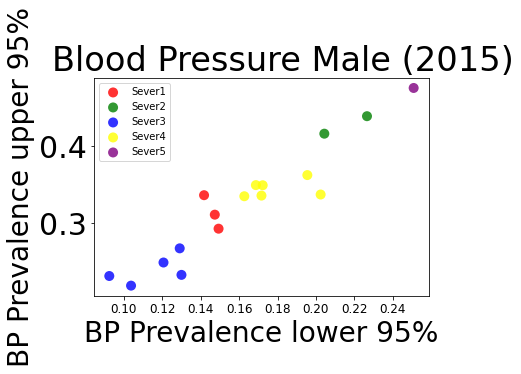

([['0.0715548804269977'], ['0.0900606980175541'], ['0.0885178034743967'], ['0.0879244776964927'], ['0.0827196460760828'], ['0.0654750560953577']], [['0.14978751885612'], ['0.160583340550052'], ['0.19059664953498695'], ['0.19633323506273495'], ['0.17446897996247698'], ['0.160663923293017']])
([['0.189872607127572'], ['0.188750966170804'], ['0.16630110616072'], ['0.15905792144753']], [['0.311332596283088'], ['0.339018607205118'], ['0.345836202048184'], ['0.338654915454776']])
([['0.113291512652756'], ['0.107021155778275'], ['0.0937941640026483'], ['0.116987031524731']], [['0.23298239739869894'], ['0.236800399367797'], ['0.21040580077145304'], ['0.229467804812097']])
([['0.211948736862044']], [['0.412702885495148']])
([['0.137207535778979'], ['0.13681561810537']], [['0.278105655059443'], ['0.311264707598001']])


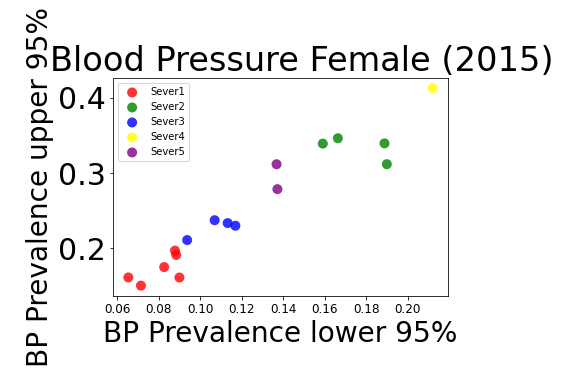

In [23]:
# Visulaize  Clusters 
title1 = '    Blood Pressure Male (2015)'
title2 = '    Blood Pressure Female (2015)'
xlabel = 'BP Prevalence lower 95%'
ylabel = 'BP Prevalence upper 95%'
plot_cluster(BP_frame1_male,title1,xlabel,ylabel)
plot_cluster(BP_frame1_female,title2,xlabel,ylabel)

## Diabetes

In [24]:
Diabetes_Male_Data = Diabetes_Countires_Wise[(Diabetes_Countires_Wise['Sex']=='Men') & 
                                             (Diabetes_Countires_Wise['Year']==2014)]
Diabetes_Male_Data

Country  Sex  Year  Age-standardised diabetes prevalence  \
34       Afghanistan  Men  2014                              0.115657   
69           Albania  Men  2014                              0.076879   
104          Algeria  Men  2014                              0.122648   
139   American Samoa  Men  2014                              0.308217   
174          Andorra  Men  2014                              0.080856   
...              ...  ...   ...                                   ...   
6859       Venezuela  Men  2014                              0.099361   
6894        Viet Nam  Men  2014                              0.055387   
6929           Yemen  Men  2014                              0.125920   
6964          Zambia  Men  2014                              0.064647   
6999        Zimbabwe  Men  2014                              0.065138   

      Lower 95% uncertainty interval  Upper 95% uncertainty interval  
34                          0.064099                        0.181914  
69                          0.038768                        0.130538  
104                         0.074322                        0.188026  
139                         0.191112                        0.436937  
174                         0.042523                        0.135115  
...                              ...                             ...  
6859                        0.052731                        0.157218  
6894                        0.028874                        0.091774  
6929                        0.066533                        0.205520  
6964                        0.032623                        0.110546  
6999                        0.031340                        0.115730  

[200 rows x 6 columns]

In [25]:
## Check the List of Countries avaialable

## Columns renaming for Uniformity
Diabetes_Male_Data = Diabetes_Countires_Wise[(Diabetes_Countires_Wise['Sex']=='Men') & 
                                             (Diabetes_Countires_Wise['Year']==2014)]

Diabetes_Female_Data =Diabetes_Countires_Wise[(Diabetes_Countires_Wise['Sex']=='Women') & 
                                             (Diabetes_Countires_Wise['Year']==2014)]
#------------------------------------------------------------
Diabetes_Countires_Wise_complete = Diabetes_Male_Data
# Diabetes Data 
Diabetes_Countires_Wise_complete = np.array(Diabetes_Countires_Wise_complete)
Diabetes_Countires_Wise_complete[:,[3,4,5]] = np.array(Diabetes_Countires_Wise_complete[:,[3,4,5]]).astype(float)
selected_countries = np.zeros(shape=(1,4)) 
data_diabetes = Diabetes_Countires_Wise_complete[:,[0,1,2,3,4,5]]
print(data_diabetes)
filter2 = []
for i in countries:
    filter2.clear()
    for j in range(0,len(data_diabetes[:,0])):
            if(data_diabetes[j,0] == i):
                filter2.append(True)
            else:
                filter2.append(False)
    Diabetes_Countires_Wise_complete = data_diabetes[filter2]
    for j in range(0,len(Diabetes_Countires_Wise_complete[:,0])):
                if(Diabetes_Countires_Wise_complete[j,0] == i):
                    val1 = ((sum(Diabetes_Countires_Wise_complete[:,3]))/len(Diabetes_Countires_Wise_complete[:,[3]]))
                    val2 = ((sum(Diabetes_Countires_Wise_complete[:,4]))/len(Diabetes_Countires_Wise_complete[:,[4]]))
                    val3 = ((sum(Diabetes_Countires_Wise_complete[:,5]))/len(Diabetes_Countires_Wise_complete[:,[5]]))
                    selected_countries = np.append(selected_countries,[str(i),float(val1),float(val2),float(val3)])
                    selected_countries = selected_countries.reshape((int(len(selected_countries)/4)),4)
                    break;
selected_countries_male   = selected_countries[1:,[0,1,2,3]]
print("-----------------------------------------MALE DATA-------------------------------------------------")
print(selected_countries_male[:,[0,1,2,3]])

#-----------------------------------------------------------------------------------------------------------------------

Diabetes_Countires_Wise_complete = Diabetes_Female_Data
# Diabetes Data 
Diabetes_Countires_Wise_complete = np.array(Diabetes_Countires_Wise_complete)
Diabetes_Countires_Wise_complete[:,[3,4,5]] = np.array(Diabetes_Countires_Wise_complete[:,[3,4,5]]).astype(float)
selected_countries = np.zeros(shape=(1,4)) 
data_diabetes = Diabetes_Countires_Wise_complete[:,[0,1,2,3,4,5]]
print(data_diabetes)
filter2 = []
for i in countries:
    filter2.clear()
    for j in range(0,len(data_diabetes[:,0])):
            if(data_diabetes[j,0] == i):
                filter2.append(True)
            else:
                filter2.append(False)
    Diabetes_Countires_Wise_complete = data_diabetes[filter2]
    for j in range(0,len(Diabetes_Countires_Wise_complete[:,0])):
                if(Diabetes_Countires_Wise_complete[j,0] == i):
                    val1 = ((sum(Diabetes_Countires_Wise_complete[:,3]))/len(Diabetes_Countires_Wise_complete[:,[3]]))
                    val2 = ((sum(Diabetes_Countires_Wise_complete[:,4]))/len(Diabetes_Countires_Wise_complete[:,[4]]))
                    val3 = ((sum(Diabetes_Countires_Wise_complete[:,5]))/len(Diabetes_Countires_Wise_complete[:,[5]]))
                    selected_countries = np.append(selected_countries,[str(i),float(val1),float(val2),float(val3)])
                    selected_countries = selected_countries.reshape((int(len(selected_countries)/4)),4)
                    break;
selected_countries_female   = selected_countries[1:,[0,1,2,3]]
print("-----------------------------------------Female DATA-------------------------------------------------")
print(selected_countries_female[:,[0,1,2,3]])


[['Afghanistan' 'Men' 2014 0.115657280438063 0.0640989369903711
  0.18191379430512306]
 ['Albania' 'Men' 2014 0.0768787065262333 0.0387682805776147
  0.13053794979630198]
 ['Algeria' 'Men' 2014 0.122647582827742 0.0743218153722432
  0.188025758603392]
 ...
 ['Yemen' 'Men' 2014 0.12591963401798598 0.0665325354547242
  0.20552018398348604]
 ['Zambia' 'Men' 2014 0.064647058833324 0.032622844435312
  0.110545641393193]
 ['Zimbabwe' 'Men' 2014 0.0651377446270955 0.0313399430262513
  0.115730499206471]]
-----------------------------------------MALE DATA-------------------------------------------------
[['Afghanistan' '0.115657280438063' '0.0640989369903711'
  '0.18191379430512306']
 ['Italy' '0.070540891144998' '0.0390557166601463' '0.111994432949267']
 ['Kuwait' '0.19659365448643495' '0.128437913333102' '0.280923396162734']
 ['India' '0.0905389299901901' '0.0519135364345059' '0.141733485003068']
 ['South Africa' '0.096665809716039' '0.049477297985462985'
  '0.162597608684157']
 ['US' '0.081

In [26]:
def cluster_diabetes(selected_countries):    
    clustering = KMeans(n_clusters=5, random_state=0).fit(selected_countries[:,[1,2,3]])
    clustering.labels_
    clus = list(clustering.labels_)
    DB_frame = list(zip(countries,clus))
    print(DB_frame)
    print("-------------------------cluster data wise---------------------------------------")
    DB_frame1 = list(zip(selected_countries[:,[2]].tolist(),selected_countries[:,[3]].tolist(),clus))
    print(DB_frame1)
    return DB_frame1,DB_frame
Diabetes_frame1_male,Diabetes_frame_male = cluster_diabetes(selected_countries_male)
Diabetes_frame1_female,Diabetes_frame_female = cluster_diabetes(selected_countries_female)

[('Afghanistan', 2), ('Italy', 0), ('Kuwait', 1), ('India', 3), ('South Africa', 3), ('US', 0), ('United Kingdom', 4), ('Sri Lanka', 0), ('Chile', 3), ('Norway', 4), ('New Zealand', 0), ('Switzerland', 4), ('Australia', 4), ('Canada', 4), ('China', 3), ('Slovenia', 0), ('North Macedonia', 0)]
-------------------------cluster data wise---------------------------------------
[(['0.0640989369903711'], ['0.18191379430512306'], 2), (['0.0390557166601463'], ['0.111994432949267'], 0), (['0.128437913333102'], ['0.280923396162734'], 1), (['0.0519135364345059'], ['0.141733485003068'], 3), (['0.049477297985462985'], ['0.162597608684157'], 3), (['0.04917663608338299'], ['0.12688300699918198'], 0), (['0.0410463467920604'], ['0.0973914102554907'], 4), (['0.0361244069778972'], ['0.120125676193149'], 0), (['0.0550617357823444'], ['0.162467681408099'], 3), (['0.033379929258764'], ['0.101313143238934'], 4), (['0.0430837658559384'], ['0.127178369389441'], 0), (['0.0282416047898997'], ['0.0893571252370888

([['0.0390557166601463'], ['0.04917663608338299'], ['0.0361244069778972'], ['0.0430837658559384'], ['0.0357579275690445'], ['0.0379989388390214']], [['0.111994432949267'], ['0.12688300699918198'], ['0.120125676193149'], ['0.127178369389441'], ['0.125977057412331'], ['0.129168334398978']])
([['0.128437913333102']], [['0.280923396162734']])
([['0.0640989369903711']], [['0.18191379430512306']])
([['0.0519135364345059'], ['0.049477297985462985'], ['0.0550617357823444'], ['0.0572596662556004']], [['0.141733485003068'], ['0.162597608684157'], ['0.162467681408099'], ['0.156727691034957']])
([['0.0410463467920604'], ['0.033379929258764'], ['0.0282416047898997'], ['0.0382184308923058'], ['0.0333950755845099']], [['0.0973914102554907'], ['0.101313143238934'], ['0.0893571252370888'], ['0.104891861019327'], ['0.10290133711784698']])


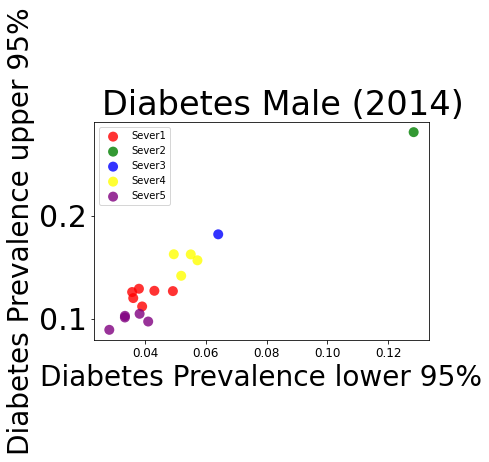

([['0.0253462211341122'], ['0.0380885626744021'], ['0.030698369069719'], ['0.0337574261799497'], ['0.0294787355288478'], ['0.025480953154528']], [['0.0757356514146685'], ['0.0994506145458595'], ['0.0743259723416983'], ['0.0958680808280457'], ['0.0786018877499408'], ['0.0785437773772023']])
([['0.128861318022938']], [['0.2768971654608581']])
([['0.0684423014092854'], ['0.0684257029766636'], ['0.0607313275313987']], [['0.18791473068808895'], ['0.201616238506998'], ['0.16958595690869802']])
([['0.0476258251062137'], ['0.0401715220857446'], ['0.0425619480686273'], ['0.0342600765544688'], ['0.0339922474303342']], [['0.127598146613857'], ['0.12805524438767502'], ['0.12175923031805802'], ['0.121210571905457'], ['0.11791766371713497']])
([['0.0202037687459197'], ['0.0144067076851152']], [['0.0649988092169812'], ['0.0478294607210449']])


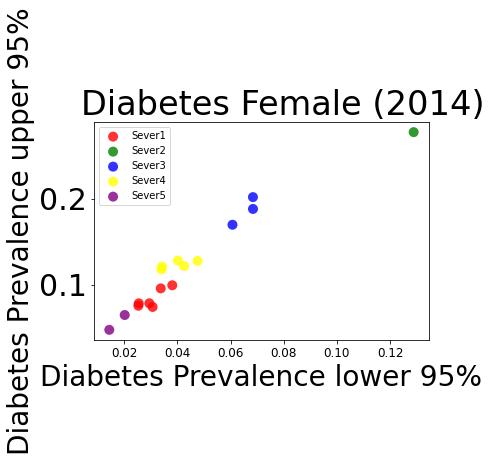

In [27]:
# Visulaize  Clusters 
title1 = '    Diabetes Male (2014)'
title2 = '    Diabetes Female (2014)'
xlabel = 'Diabetes Prevalence lower 95%'
ylabel = 'Diabetes Prevalence upper 95%'
plot_cluster(Diabetes_frame1_male,title1,xlabel,ylabel)
plot_cluster(Diabetes_frame1_female,title2,xlabel,ylabel)

## Tuber Culosis

In [28]:
## Check the List of Countries avaialable

## Columns renaming for Uniformity

#------------------------------------------------------------
Tuber_Culosis_Countires_Wise_complete = Tuber_Culosis_Countires_Wise
# TB Data 
Tuber_Culosis_Countires_Wise_complete = np.array(Tuber_Culosis_Countires_Wise_complete)
Tuber_Culosis_Countires_Wise_complete[:,[1,2]] = np.array(Tuber_Culosis_Countires_Wise_complete[:,[1,2]]).astype(int)
selected_countries = np.zeros(shape=(1,3)) 
data_tb = Tuber_Culosis_Countires_Wise_complete[:,[0,1,2]]
filter2 = []
for i in countries:
    filter2.clear()
    for j in range(0,len(data_tb[:,0])):
            if(data_tb[j,0] == i):
                filter2.append(True)
            else:
                filter2.append(False)
    Tuber_Culosis_Countires_Wise_complete = data_tb[filter2]
    for j in range(0,len(Tuber_Culosis_Countires_Wise_complete[:,0])):
                if(Tuber_Culosis_Countires_Wise_complete[j,0] == i):
                    val1 = ((sum(Tuber_Culosis_Countires_Wise_complete[:,1]))/len(Tuber_Culosis_Countires_Wise_complete[:,[1]]))
                    val2 = ((sum(Tuber_Culosis_Countires_Wise_complete[:,2]))/len(Tuber_Culosis_Countires_Wise_complete[:,[2]]))
                    selected_countries = np.append(selected_countries,[str(i),int(val1),int(val2)])
                    selected_countries = selected_countries.reshape((int(len(selected_countries)/3)),3)
                    break;
selected_countries   = selected_countries[1:,[0,1,2]]


print(selected_countries[:,[0,1,2]])

[['Afghanistan' '5122' '22528']
 ['Italy' '642' '3918']
 ['Kuwait' '175' '621']
 ['India' '274316' '1266364']
 ['South Africa' '58840' '176602']
 ['US' '6646' '17812']
 ['United Kingdom' '1158' '6938']
 ['Sri Lanka' '1759' '7708']
 ['Chile' '637' '4170']
 ['Norway' '65' '298']
 ['New Zealand' '67' '340']
 ['Switzerland' '129' '755']
 ['Australia' '260' '1113']
 ['Canada' '958' '1873']
 ['China' '147180' '536799']
 ['Slovenia' '59' '470']
 ['North Macedonia' '80' '409']]


In [29]:
clustering = KMeans(n_clusters=5, random_state=0).fit(selected_countries[:,[1,2]])
clustering.labels_
clus = list(clustering.labels_)
TB_frame = list(zip(countries,clus))
print(TB_frame)
print("-------------------------cluster data wise---------------------------------------")
TB_frame1 = list(zip(selected_countries[:,[1]].tolist(),selected_countries[:,[2]].tolist(),clus))
print(TB_frame1)

[('Afghanistan', 4), ('Italy', 0), ('Kuwait', 0), ('India', 1), ('South Africa', 3), ('US', 4), ('United Kingdom', 0), ('Sri Lanka', 0), ('Chile', 0), ('Norway', 0), ('New Zealand', 0), ('Switzerland', 0), ('Australia', 0), ('Canada', 0), ('China', 2), ('Slovenia', 0), ('North Macedonia', 0)]
-------------------------cluster data wise---------------------------------------
[(['5122'], ['22528'], 4), (['642'], ['3918'], 0), (['175'], ['621'], 0), (['274316'], ['1266364'], 1), (['58840'], ['176602'], 3), (['6646'], ['17812'], 4), (['1158'], ['6938'], 0), (['1759'], ['7708'], 0), (['637'], ['4170'], 0), (['65'], ['298'], 0), (['67'], ['340'], 0), (['129'], ['755'], 0), (['260'], ['1113'], 0), (['958'], ['1873'], 0), (['147180'], ['536799'], 2), (['59'], ['470'], 0), (['80'], ['409'], 0)]


([['642'], ['175'], ['1158'], ['1759'], ['637'], ['65'], ['67'], ['129'], ['260'], ['958'], ['59'], ['80']], [['3918'], ['621'], ['6938'], ['7708'], ['4170'], ['298'], ['340'], ['755'], ['1113'], ['1873'], ['470'], ['409']])
([['274316']], [['1266364']])
([['147180']], [['536799']])
([['58840']], [['176602']])
([['5122'], ['6646']], [['22528'], ['17812']])


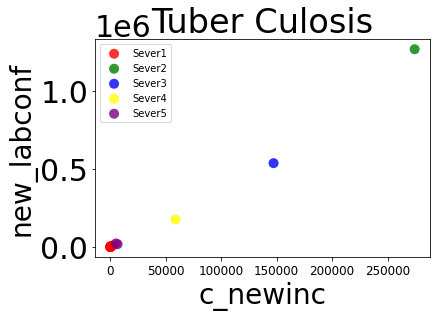

In [30]:
# Visulaize  Clusters 
title = 'Tuber Culosis'
xlabel = 'c_newinc'
ylabel = 'new_labconf'
plot_cluster(TB_frame1,title,xlabel,ylabel)

## Medical Expending

In [31]:
## Check the List of Countries avaialable

## Columns renaming for Uniformity

#------------------------------------------------------------
Medical_Expending_Countires_Wise_complete = Medical_Expending_Countires_Wise
# TB Data 
Medical_Expending_Countires_Wise_complete = np.array(Medical_Expending_Countires_Wise_complete)
Medical_Expending_Countires_Wise_complete[:,[1,2,3]] = np.array(Medical_Expending_Countires_Wise_complete[:,[1,2,3]]).astype(int)
selected_countries = np.zeros(shape=(1,4)) 
data_ME = Medical_Expending_Countires_Wise_complete[:,[0,1,2,3]]
filter2 = []
for i in countries:
    filter2.clear()
    for j in range(0,len(data_ME[:,0])):
            if(data_ME[j,0] == i):
                filter2.append(True)
            else:
                filter2.append(False)
    Medical_Expending_Countires_Wise_complete = data_ME[filter2]
    for j in range(0,len(Medical_Expending_Countires_Wise_complete[:,0])):
                if(Medical_Expending_Countires_Wise_complete[j,0] == i):
                    val1 = ((sum(Medical_Expending_Countires_Wise_complete[:,1]))/len(Medical_Expending_Countires_Wise_complete[:,[1]]))
                    val2 = ((sum(Medical_Expending_Countires_Wise_complete[:,2]))/len(Medical_Expending_Countires_Wise_complete[:,[2]]))
                    val3 = ((sum(Medical_Expending_Countires_Wise_complete[:,3]))/len(Medical_Expending_Countires_Wise_complete[:,[3]]))
                    selected_countries = np.append(selected_countries,[str(i),int(val1),int(val2),int(val3)])
                    selected_countries = selected_countries.reshape((int(len(selected_countries)/4)),4)
                    break;
selected_countries   = selected_countries[1:,[0,1,2,3]]


print(selected_countries[:,[0,1,2,3]])

[['Afghanistan' '60' '61' '67']
 ['Italy' '2708' '2736' '2840']
 ['Kuwait' '1168' '1072' '1529']
 ['India' '58' '60' '69']
 ['South Africa' '470' '428' '499']
 ['US' '9538' '9941' '10246']
 ['United Kingdom' '4326' '3945' '3858']
 ['Sri Lanka' '151' '153' '159']
 ['Chile' '1140' '1190' '1381']
 ['Norway' '7565' '7496' '7936']
 ['New Zealand' '3582' '3745' '3937']
 ['Switzerland' '9807' '9835' '9956']
 ['Australia' '4887' '4999' '5331']
 ['Canada' '4539' '4518' '4754']
 ['China' '392' '398' '440']
 ['Slovenia' '1775' '1834' '1920']
 ['North Macedonia' '306' '327' '328']]


In [32]:
clustering = KMeans(n_clusters=5, random_state=0).fit(selected_countries[:,[1,2,3]])
clustering.labels_
clus = list(clustering.labels_)
medical_expend_frame = list(zip(countries,clus))
print(medical_expend_frame)
print("-------------------------cluster data wise---------------------------------------")
medical_expend_frame1 = list(zip(selected_countries[:,[2]].tolist(),selected_countries[:,[3]].tolist(),clus))
print(medical_expend_frame1)

[('Afghanistan', 0), ('Italy', 4), ('Kuwait', 4), ('India', 0), ('South Africa', 0), ('US', 3), ('United Kingdom', 2), ('Sri Lanka', 0), ('Chile', 4), ('Norway', 1), ('New Zealand', 2), ('Switzerland', 3), ('Australia', 2), ('Canada', 2), ('China', 0), ('Slovenia', 4), ('North Macedonia', 0)]
-------------------------cluster data wise---------------------------------------
[(['61'], ['67'], 0), (['2736'], ['2840'], 4), (['1072'], ['1529'], 4), (['60'], ['69'], 0), (['428'], ['499'], 0), (['9941'], ['10246'], 3), (['3945'], ['3858'], 2), (['153'], ['159'], 0), (['1190'], ['1381'], 4), (['7496'], ['7936'], 1), (['3745'], ['3937'], 2), (['9835'], ['9956'], 3), (['4999'], ['5331'], 2), (['4518'], ['4754'], 2), (['398'], ['440'], 0), (['1834'], ['1920'], 4), (['327'], ['328'], 0)]


([['61'], ['60'], ['428'], ['153'], ['398'], ['327']], [['67'], ['69'], ['499'], ['159'], ['440'], ['328']])
([['7496']], [['7936']])
([['3945'], ['3745'], ['4999'], ['4518']], [['3858'], ['3937'], ['5331'], ['4754']])
([['9941'], ['9835']], [['10246'], ['9956']])
([['2736'], ['1072'], ['1190'], ['1834']], [['2840'], ['1529'], ['1381'], ['1920']])


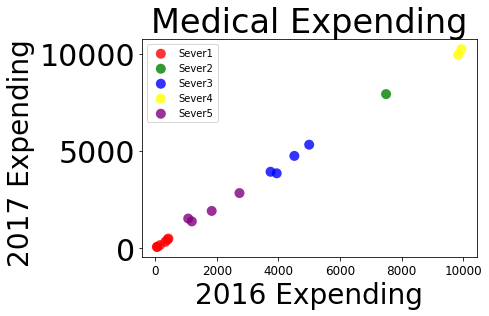

In [33]:
# Visulaize  Clusters 
title = 'Medical Expending'
xlabel = '2016 Expending'
ylabel = '2017 Expending '
plot_cluster(medical_expend_frame1,title,xlabel,ylabel)

## Listing all the Clusters of Comorbidites

In [34]:
print("Covid-->\n")
print(covid_frame)
print("\nHIV-->\n")
print(hiv_frame)
print("\nDiabetes Male-->\n")
print(Diabetes_frame_male)
print("\nDiabetes Female-->\n")
print(Diabetes_frame_female)
print("\nBP Male-->\n")
print(BP_frame_male)
print("\nBP Female-->\n")
print(BP_frame_female)
print("\nTB-->\n")
print(TB_frame)
print("\nMedical-->\n")
print(medical_expend_frame)

Covid-->

[('Afghanistan', 0), ('Italy', 3), ('Kuwait', 0), ('India', 2), ('South Africa', 3), ('US', 1), ('United Kingdom', 4), ('Sri Lanka', 0), ('Chile', 3), ('Norway', 0), ('New Zealand', 0), ('Switzerland', 0), ('Australia', 0), ('Canada', 0), ('China', 3), ('Slovenia', 0), ('North Macedonia', 0)]

HIV-->

[('Afghanistan', 4), ('Italy', 2), ('Kuwait', 4), ('India', 4), ('South Africa', 1), ('US', 4), ('United Kingdom', 3), ('Sri Lanka', 4), ('Chile', 3), ('Norway', 4), ('New Zealand', 4), ('Switzerland', 4), ('Australia', 0), ('Canada', 4), ('China', 4), ('Slovenia', 4), ('North Macedonia', 4)]

Diabetes Male-->

[('Afghanistan', 2), ('Italy', 0), ('Kuwait', 1), ('India', 3), ('South Africa', 3), ('US', 0), ('United Kingdom', 4), ('Sri Lanka', 0), ('Chile', 3), ('Norway', 4), ('New Zealand', 0), ('Switzerland', 4), ('Australia', 4), ('Canada', 4), ('China', 3), ('Slovenia', 0), ('North Macedonia', 0)]

Diabetes Female-->

[('Afghanistan', 2), ('Italy', 0), ('Kuwait', 1), ('India',

# Main Cluster for Prediction

## Main Mega Frame Formation

In [35]:
final_frame = np.concatenate([covid_frame,hiv_frame,Diabetes_frame_male,Diabetes_frame_female,BP_frame_male,BP_frame_female,TB_frame,medical_expend_frame], axis=1)
final_frame = final_frame[:,[0,1,3,5,7,9,11,13,15]]
#TB_frame

In [36]:
print(final_frame)

[['Afghanistan' '0' '4' '2' '2' '1' '3' '4' '0']
 ['Italy' '3' '2' '0' '0' '3' '2' '0' '4']
 ['Kuwait' '0' '4' '1' '1' '3' '4' '0' '4']
 ['India' '2' '4' '3' '3' '3' '1' '1' '0']
 ['South Africa' '3' '1' '3' '2' '3' '1' '3' '0']
 ['US' '1' '4' '0' '0' '2' '0' '4' '3']
 ['United Kingdom' '4' '3' '4' '0' '2' '0' '0' '2']
 ['Sri Lanka' '0' '4' '0' '3' '0' '4' '0' '0']
 ['Chile' '3' '3' '3' '2' '3' '2' '0' '4']
 ['Norway' '0' '4' '4' '4' '3' '2' '0' '1']
 ['New Zealand' '0' '4' '0' '0' '2' '0' '0' '2']
 ['Switzerland' '0' '4' '4' '4' '0' '0' '0' '3']
 ['Australia' '0' '0' '4' '0' '2' '0' '0' '2']
 ['Canada' '0' '4' '4' '0' '2' '0' '0' '2']
 ['China' '3' '4' '3' '3' '0' '2' '2' '0']
 ['Slovenia' '0' '4' '0' '3' '4' '1' '0' '4']
 ['North Macedonia' '0' '4' '0' '3' '1' '1' '0' '0']]


In [37]:
clustering = KMeans(n_clusters=5, random_state=0).fit(final_frame[:,[1,2,3,4,5,6,7,8]])
clustering.labels_
clus = list(clustering.labels_)
final_Clus_frame = list(zip(countries,clus))
print(final_Clus_frame)
final_Clus_frame1 = list(zip(final_frame[:,[1]].tolist(),final_frame[:,[2]].tolist(),clus))
print(final_Clus_frame1)

[('Afghanistan', 2), ('Italy', 1), ('Kuwait', 1), ('India', 0), ('South Africa', 0), ('US', 1), ('United Kingdom', 3), ('Sri Lanka', 2), ('Chile', 3), ('Norway', 4), ('New Zealand', 1), ('Switzerland', 4), ('Australia', 4), ('Canada', 4), ('China', 0), ('Slovenia', 1), ('North Macedonia', 2)]
[(['0'], ['4'], 2), (['3'], ['2'], 1), (['0'], ['4'], 1), (['2'], ['4'], 0), (['3'], ['1'], 0), (['1'], ['4'], 1), (['4'], ['3'], 3), (['0'], ['4'], 2), (['3'], ['3'], 3), (['0'], ['4'], 4), (['0'], ['4'], 1), (['0'], ['4'], 4), (['0'], ['0'], 4), (['0'], ['4'], 4), (['3'], ['4'], 0), (['0'], ['4'], 1), (['0'], ['4'], 2)]


([['2'], ['3'], ['3']], [['4'], ['1'], ['4']])
([['3'], ['0'], ['1'], ['0'], ['0']], [['2'], ['4'], ['4'], ['4'], ['4']])
([['0'], ['0'], ['0']], [['4'], ['4'], ['4']])
([['4'], ['3']], [['3'], ['3']])
([['0'], ['0'], ['0'], ['0']], [['4'], ['4'], ['0'], ['4']])


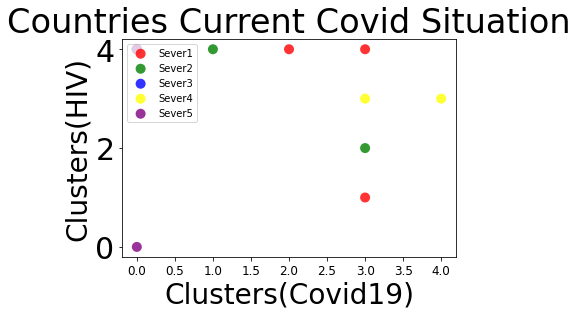

In [38]:
# Visulaize  Clusters 
title = 'Countries Current Covid Situation'
xlabel = 'Clusters(Covid19)'
ylabel = 'Clusters(HIV)'
plot_cluster(final_Clus_frame1,title,xlabel,ylabel)

# Vaccine Dosage Prediction

## For Now 

### Sever 1 = 20%
### Sever 2 = 40%
### Sever 3 = 60%
### Sever 4 = 80%
### Sever 5 = 100%

# Minimum  Vaccine Dosage Requirment Calcualtion

In [39]:
final_Clus_frame

[('Afghanistan', 2),
 ('Italy', 1),
 ('Kuwait', 1),
 ('India', 0),
 ('South Africa', 0),
 ('US', 1),
 ('United Kingdom', 3),
 ('Sri Lanka', 2),
 ('Chile', 3),
 ('Norway', 4),
 ('New Zealand', 1),
 ('Switzerland', 4),
 ('Australia', 4),
 ('Canada', 4),
 ('China', 0),
 ('Slovenia', 1),
 ('North Macedonia', 2)]

In [40]:
set(Population_Data_Countires_Wise['Country'])

{'Afghanistan',
 'Africa',
 'African Group',
 'African Union',
 'African Union: Central Africa',
 'African Union: Eastern Africa',
 'African Union: Northern Africa',
 'African Union: Southern Africa',
 'African Union: Western Africa',
 'African, Caribbean and Pacific (ACP) Group of States',
 'Albania',
 'Algeria',
 'Andean Community',
 'Angola',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Aruba',
 'Asia',
 'Asia-Pacific Economic Cooperation (APEC)',
 'Asia-Pacific Group',
 'Association of Southeast Asian Nations (ASEAN)',
 'Australia',
 'Australia/New Zealand',
 'Austria',
 'Azerbaijan',
 'BRIC',
 'BRICS',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Belt-Road Initiative (BRI)',
 'Belt-Road Initiative: Africa',
 'Belt-Road Initiative: Asia',
 'Belt-Road Initiative: Europe',
 'Belt-Road Initiative: Latin America and the Caribbean',
 'Belt-Road Initiative: Pacific',
 'Benin',
 'Bhutan',
 'Black Sea Economic Cooperation (BSEC)',
 'Boliva

In [41]:
Population_Data_Countires_Wise_complete = Population_Data_Countires_Wise
# Covid Data 
Population_Data_Countires_Wise_complete = np.array(Population_Data_Countires_Wise_complete)
Population_Data_Countires_Wise_complete[:,[9,10,11]]

array([[139.66899999999998, 154.91299999999995, 294.582],
       [131.916, 141.851, 273.767],
       [125.127, 130.632, 255.759],
       ...,
       [0.006, 0.043, 0.049],
       [0.002, 0.015, 0.017],
       [0.002, 0.018000000000000002, 0.02]], dtype=object)

In [42]:
countries = ['Afghanistan','Italy' , 'Kuwait', 'India', 'South Africa' ,'US', 
             'United Kingdom','Sri Lanka', 'Chile' , 'Norway', 'New Zealand' ,'Switzerland', 
'Australia', 'Canada', 'China','Slovenia','North Macedonia']

In [43]:
Population_Data_Countires_Wise_complete = Population_Data_Countires_Wise
# Covid Data 
Population_Data_Countires_Wise_complete = np.array(Population_Data_Countires_Wise_complete)
Population_Data_Countires_Wise_complete[:,[9,10,11]] = np.array(Population_Data_Countires_Wise_complete[:,[9,10,11]]).astype(int)
selected_countries = np.zeros(shape=(1,4)) 
data_pop = Population_Data_Countires_Wise_complete
filter3 = []
for i in countries:
    filter3.clear()
    for j in range(0,len(data_pop[:,0])):
            if(data_pop[j,1] == i):
                filter3.append(True)
            else:
                filter3.append(False)
    Population_Data_Countires_Wise_complete = data_pop[filter3]
    for j in range(0,len(Population_Data_Countires_Wise_complete[:,0])):
                if(Population_Data_Countires_Wise_complete[j,1] == i):
                    val1 = ((sum(Population_Data_Countires_Wise_complete[:,9]))/len(Population_Data_Countires_Wise_complete[:,[9]]))
                    val2 = ((sum(Population_Data_Countires_Wise_complete[:,10]))/len(Population_Data_Countires_Wise_complete[:,[10]]))
                    val3 = ((sum(Population_Data_Countires_Wise_complete[:,11]))/len(Population_Data_Countires_Wise_complete[:,[11]]))
                    selected_countries = np.append(selected_countries,[str(i),int(val1),int(val2),int(val3)])
                    selected_countries = selected_countries.reshape((int(len(selected_countries)/4)),4)
                    break;
selected_countries   = selected_countries[1:,[0,1,2,3]]


print(selected_countries)

[['Afghanistan' '85' '80' '167']
 ['Italy' '265' '280' '546']
 ['Kuwait' '8' '6' '15']
 ['India' '4176' '3872' '8048']
 ['South Africa' '164' '167' '331']
 ['US' '1187' '1221' '2409']
 ['United Kingdom' '275' '290' '567']
 ['Sri Lanka' '76' '75' '152']
 ['Chile' '60' '61' '122']
 ['Norway' '20' '20' '41']
 ['New Zealand' '15' '16' '32']
 ['Switzerland' '31' '32' '64']
 ['Australia' '78' '78' '157']
 ['Canada' '126' '127' '254']
 ['China' '5287' '5004' '10292']
 ['Slovenia' '8' '8' '17']
 ['North Macedonia' '8' '8' '17']]


In [44]:
final_Clus_frame = np.concatenate([final_Clus_frame,selected_countries], axis=1)

In [45]:
print(selected_countries)

[['Afghanistan' '85' '80' '167']
 ['Italy' '265' '280' '546']
 ['Kuwait' '8' '6' '15']
 ['India' '4176' '3872' '8048']
 ['South Africa' '164' '167' '331']
 ['US' '1187' '1221' '2409']
 ['United Kingdom' '275' '290' '567']
 ['Sri Lanka' '76' '75' '152']
 ['Chile' '60' '61' '122']
 ['Norway' '20' '20' '41']
 ['New Zealand' '15' '16' '32']
 ['Switzerland' '31' '32' '64']
 ['Australia' '78' '78' '157']
 ['Canada' '126' '127' '254']
 ['China' '5287' '5004' '10292']
 ['Slovenia' '8' '8' '17']
 ['North Macedonia' '8' '8' '17']]


In [46]:
final_Clus_frame = final_Clus_frame[:,[0,1,3,4,5]]
print(final_Clus_frame)

[['Afghanistan' '2' '85' '80' '167']
 ['Italy' '1' '265' '280' '546']
 ['Kuwait' '1' '8' '6' '15']
 ['India' '0' '4176' '3872' '8048']
 ['South Africa' '0' '164' '167' '331']
 ['US' '1' '1187' '1221' '2409']
 ['United Kingdom' '3' '275' '290' '567']
 ['Sri Lanka' '2' '76' '75' '152']
 ['Chile' '3' '60' '61' '122']
 ['Norway' '4' '20' '20' '41']
 ['New Zealand' '1' '15' '16' '32']
 ['Switzerland' '4' '31' '32' '64']
 ['Australia' '4' '78' '78' '157']
 ['Canada' '4' '126' '127' '254']
 ['China' '0' '5287' '5004' '10292']
 ['Slovenia' '1' '8' '8' '17']
 ['North Macedonia' '2' '8' '8' '17']]


In [47]:
M_Vaccine_dosage = []
F_Vaccine_dosage = []
T_Vaccine_dosage = []

for i in final_Clus_frame:
    if int(i[1]) == 0:
        M_Vaccine_dosage.append(int(i[2])*0.2)
        F_Vaccine_dosage.append(int(i[3])*0.2)
        T_Vaccine_dosage.append(int(i[4])*0.2)
    elif int(i[1]) == 1:
        M_Vaccine_dosage.append(int(i[2])*0.4)
        F_Vaccine_dosage.append(int(i[3])*0.4)
        T_Vaccine_dosage.append(int(i[4])*0.4)
        
    elif int(i[1]) == 2:
        M_Vaccine_dosage.append(int(i[2])*0.6)
        F_Vaccine_dosage.append(int(i[3])*0.6)
        T_Vaccine_dosage.append(int(i[4])*0.6)
    elif int(i[1]) == 3:
        M_Vaccine_dosage.append(int(i[2])*0.8)
        F_Vaccine_dosage.append(int(i[3])*0.8)
        T_Vaccine_dosage.append(int(i[4])*0.8)
        
    elif int(i[1]) == 4:
        M_Vaccine_dosage.append(int(i[2])*1.0)
        F_Vaccine_dosage.append(int(i[3])*1.0)
        T_Vaccine_dosage.append(int(i[4])*1.0)


        

In [48]:
final_Clus_dataframe = pd.DataFrame(final_Clus_frame , 
columns=['Country','Cluster','Male_Populstion','Female_Population','Total_Population'])

final_Clus_dataframe['Min_Covid_Vaccine_for_Male'] = M_Vaccine_dosage
final_Clus_dataframe['Min_Covid_Vaccine_for_Female'] = F_Vaccine_dosage
final_Clus_dataframe['Min_Covid_Vaccine_for_total'] = T_Vaccine_dosage

print(M_Vaccine_dosage)

print(F_Vaccine_dosage) 

print(T_Vaccine_dosage)

final_Clus_dataframe








[51.0, 106.0, 3.2, 835.2, 32.800000000000004, 474.8, 220.0, 45.6, 48.0, 20.0, 6.0, 31.0, 78.0, 126.0, 1057.4, 3.2, 4.8]
[48.0, 112.0, 2.4000000000000004, 774.4000000000001, 33.4, 488.40000000000003, 232.0, 45.0, 48.800000000000004, 20.0, 6.4, 32.0, 78.0, 127.0, 1000.8000000000001, 3.2, 4.8]
[100.2, 218.4, 6.0, 1609.6000000000001, 66.2, 963.6, 453.6, 91.2, 97.60000000000001, 41.0, 12.8, 64.0, 157.0, 254.0, 2058.4, 6.800000000000001, 10.2]


Country Cluster Male_Populstion Female_Population  \
0       Afghanistan       2              85                80   
1             Italy       1             265               280   
2            Kuwait       1               8                 6   
3             India       0            4176              3872   
4      South Africa       0             164               167   
5                US       1            1187              1221   
6    United Kingdom       3             275               290   
7         Sri Lanka       2              76                75   
8             Chile       3              60                61   
9            Norway       4              20                20   
10      New Zealand       1              15                16   
11      Switzerland       4              31                32   
12        Australia       4              78                78   
13           Canada       4             126               127   
14            China       0            5287              5004   
15         Slovenia       1               8                 8   
16  North Macedonia       2               8                 8   

   Total_Population  Min_Covid_Vaccine_for_Male  Min_Covid_Vaccine_for_Female  \
0               167                        51.0                          48.0   
1               546                       106.0                         112.0   
2                15                         3.2                           2.4   
3              8048                       835.2                         774.4   
4               331                        32.8                          33.4   
5              2409                       474.8                         488.4   
6               567                       220.0                         232.0   
7               152                        45.6                          45.0   
8               122                        48.0                          48.8   
9                41                        20.0                          20.0   
10               32                         6.0                           6.4   
11               64                        31.0                          32.0   
12              157                        78.0                          78.0   
13              254                       126.0                         127.0   
14            10292                      1057.4                        1000.8   
15               17                         3.2                           3.2   
16               17                         4.8                           4.8   

    Min_Covid_Vaccine_for_total  
0                         100.2  
1                         218.4  
2                           6.0  
3                        1609.6  
4                          66.2  
5                         963.6  
6                         453.6  
7                          91.2  
8                          97.6  
9                          41.0  
10                         12.8  
11                         64.0  
12                        157.0  
13                        254.0  
14                       2058.4  
15                          6.8  
16                         10.2

##  Writing the cleaned data in Cleaned Folder

In [49]:
final_Clus_dataframe.to_csv('../final_Cluster_frame.csv')

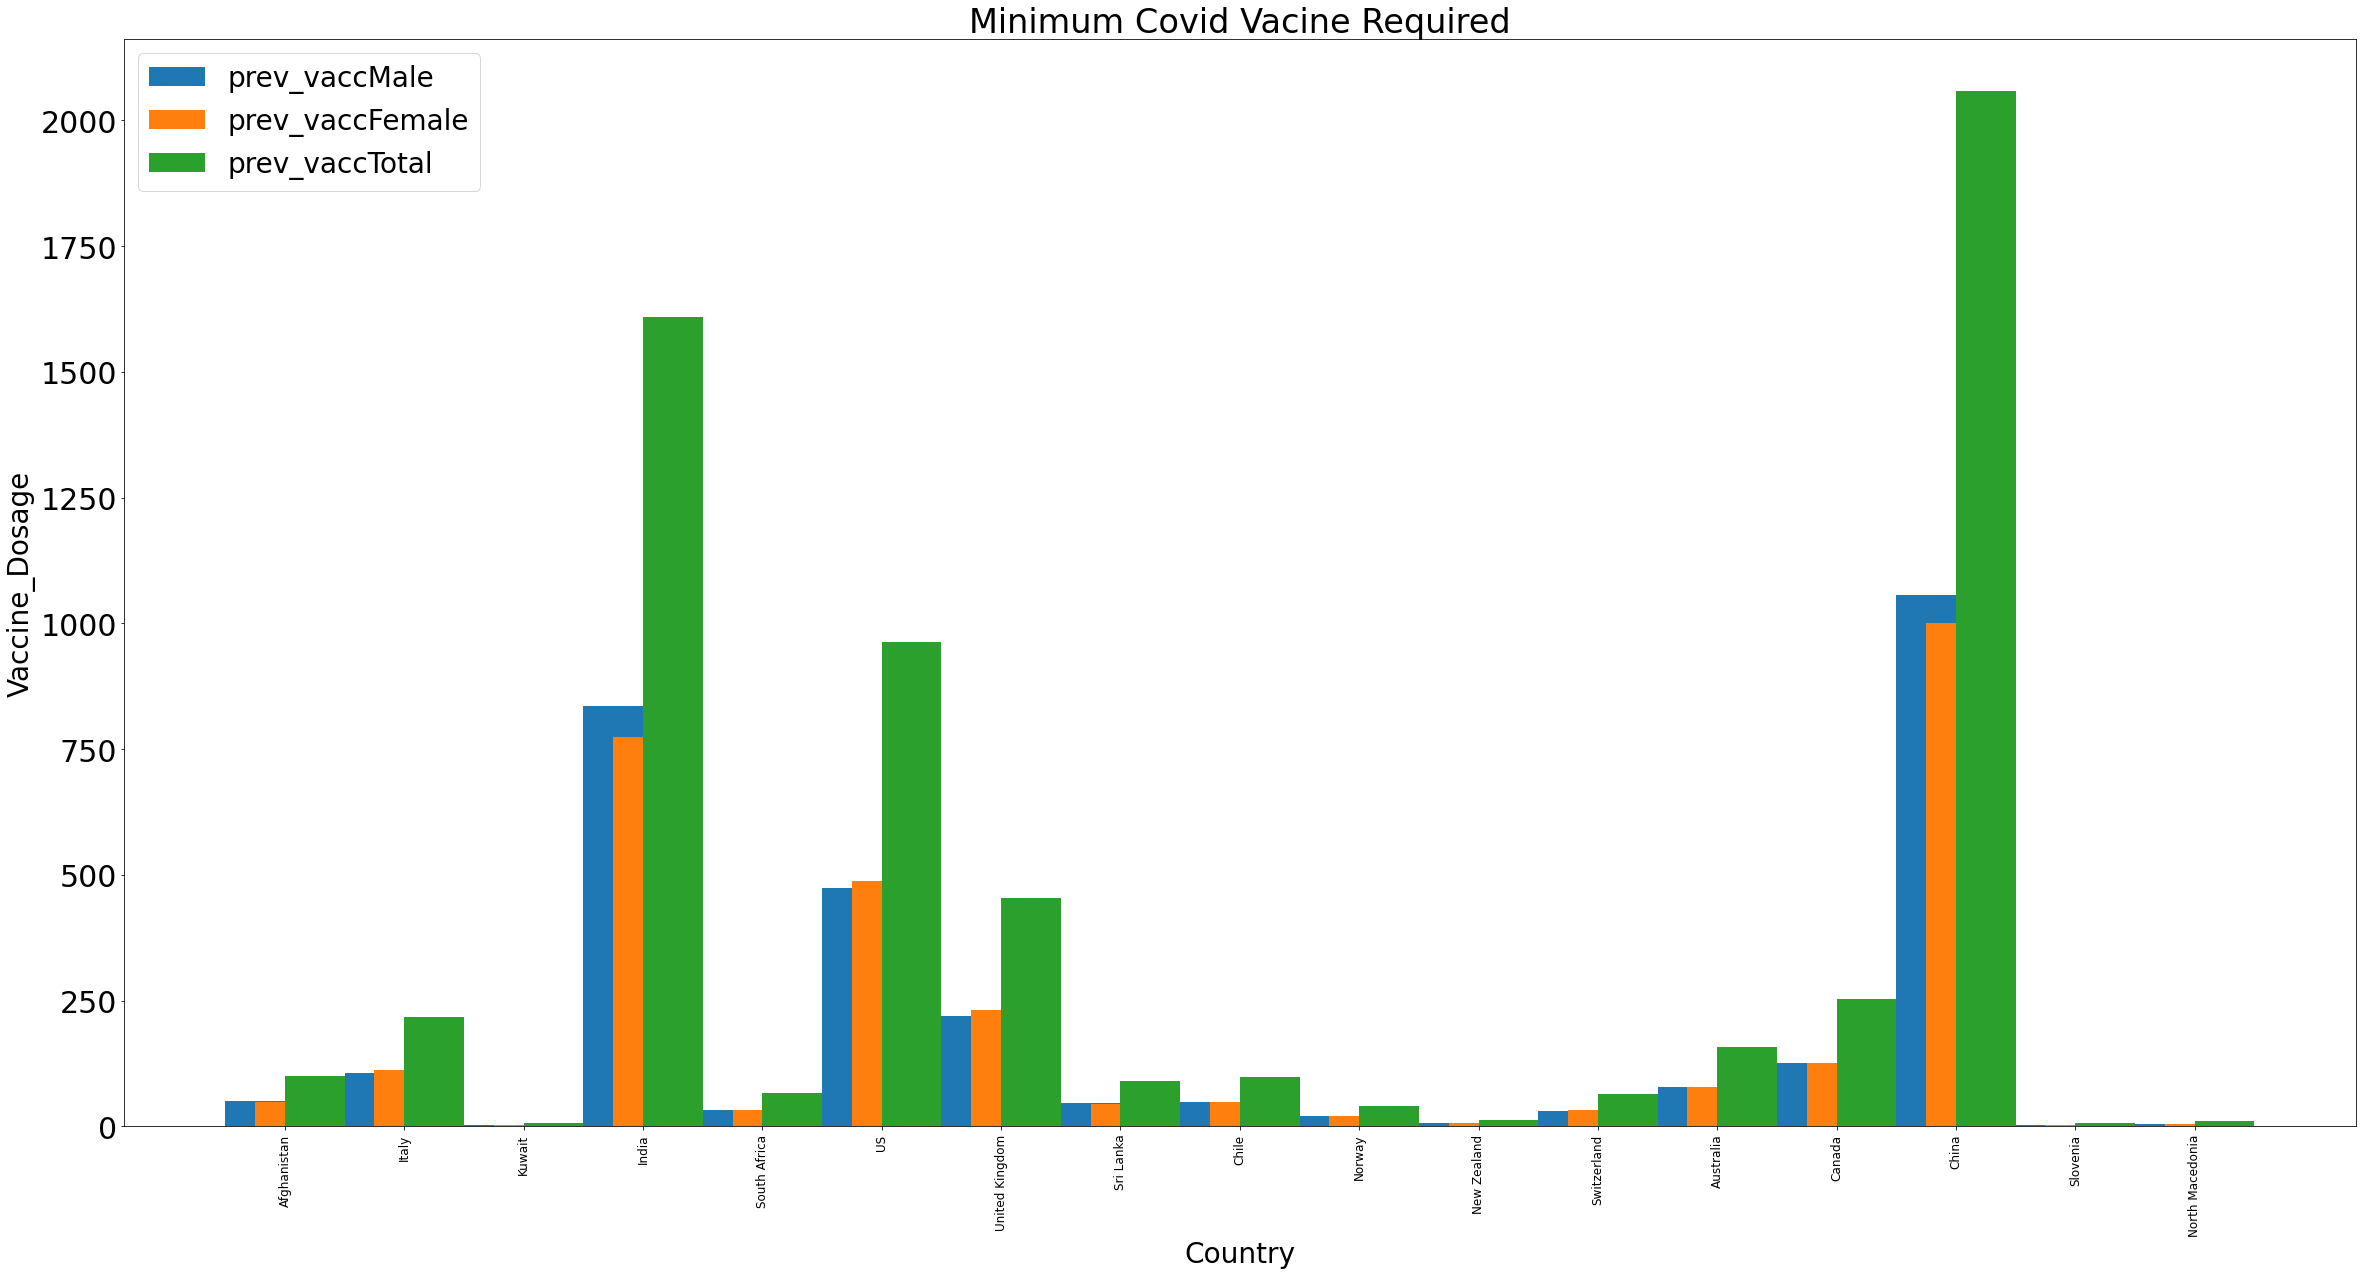

In [50]:
## Visualisation
ylab = "Vaccine_Dosage"
xlab = "Country"


df = final_Clus_dataframe
            

labels = df['Country']
prev_vaccMale = df['Min_Covid_Vaccine_for_Male']
prev_vaccFemale = df['Min_Covid_Vaccine_for_Female']
prev_vaccTotal = df['Min_Covid_Vaccine_for_total']
        
title1 = 'Minimum Covid Vacine Required'
         
#high = int(max(prev_2018))
#low = 0  

x = np.arange(len(labels))  # the x label locations 
width = .50  # the width of the bars
fig, ax = plt.subplots(figsize=(40,20))
rects1 = ax.bar(x-width/2, prev_vaccMale, width, label='prev_vaccMale')
rects2 = ax.bar(x, prev_vaccFemale, width, label='prev_vaccFemale')
rects3 = ax.bar(x+width/2, prev_vaccTotal, width, label='prev_vaccTotal')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel(ylab)
ax.set_xlabel(xlab)
ax.set_title(title1)
ax.set_xticks(x)
#ax.set_yticks(y)
plt.xticks(rotation=90) 
#plt.ylim([math.ceil(low-0.5*(high-low)), math.ceil(high+0.5*(high-low))])
ax.set_xticklabels(labels)
ax.legend()

    
    
plt.show()